In [58]:
# import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import scipy.stats as stats
import statsmodels.api as sm
import joblib
import os


In [59]:
# Load Data
from google.colab import files
uploaded = files.upload()

Saving traindata.csv to traindata (1).csv


In [60]:
train_data = pd.read_csv('traindata.csv')


In [61]:
# Load Data
from google.colab import files
uploaded = files.upload()

Saving testdata.csv to testdata (1).csv


In [62]:
test_data=pd.read_csv('testdata.csv')

In [63]:
# Display the first few rows of the dataset
#train_data
print(train_data.head())
#test_data
print(test_data.head())

    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505

In [64]:
# Display the last few rows of the dataset
#train_data
print(train_data.tail())
#test_data
print(test_data.tail())

       Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
2346  0.012956     0.336925    0.451218   0.175006           0.734664   
2347  0.407101     0.124738    0.983306   0.663867           0.361113   
2348  0.344356     0.783918    0.582171   0.996841           0.065363   
2349  0.351722     0.014278    0.898615   0.167550           0.727148   
2350  0.032726     0.053596    0.102633   0.221356           0.153956   

      Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
2346         0.382770    0.656463                 0.177502   
2347         0.663716    0.232516                 0.341056   
2348         0.242885    0.658851                 0.543017   
2349         0.046091    0.900434                 0.136227   
2350         0.216573    0.312577                 0.608940   

      Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
2346                     0.808162                                   0.684499   
2347                     0.8

In [65]:
# Get dataset info
#train_data
print(train_data.info())
#test_data
print(test_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [66]:
# Descriptive statistics
#train data set
print(train_data.describe())
#test data set
print(test_data.describe())

           Glucose  Cholesterol   Hemoglobin    Platelets  White Blood Cells  \
count  2351.000000  2351.000000  2351.000000  2351.000000        2351.000000   
mean      0.362828     0.393648     0.586190     0.504027           0.511086   
std       0.251889     0.239449     0.271498     0.303347           0.277270   
min       0.010994     0.012139     0.003021     0.012594           0.010139   
25%       0.129198     0.195818     0.346092     0.200865           0.259467   
50%       0.351722     0.397083     0.609836     0.533962           0.527381   
75%       0.582278     0.582178     0.791215     0.754841           0.743164   
max       0.968460     0.905026     0.983306     0.999393           0.990786   

       Red Blood Cells   Hematocrit  Mean Corpuscular Volume  \
count      2351.000000  2351.000000              2351.000000   
mean          0.506590     0.507152                 0.492200   
std           0.266565     0.285537                 0.275735   
min           0.044565 

In [67]:
#shape of train data
print("The shape of train data")
train_data.shape

The shape of train data


(2351, 25)

In [68]:
#shape of test data
print("The shape of test data")
test_data.shape

The shape of test data


(486, 25)

In [69]:
# Check for missing values
# train data
print(train_data.isnull().sum())


Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [70]:
# Check for missing values
#test data
print(test_data.isnull().sum())


Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [71]:
# Separate features and target variable
#train data
x_train = train_data.drop('Disease', axis=1)  # Features
y_train = train_data['Disease']               # Target variable

In [72]:
# Separate features and target variable
#test data
x_test = test_data.drop('Disease', axis=1)  # Features
y_test = test_data['Disease']               # Target variable

In [73]:
#features variable of train data shape
X_train.shape

(2351, 24)

In [74]:
#target variable of train data shape
y_train.shape

(2351,)

In [75]:
#features variable of test data shape
x_test.shape


(486, 24)

In [76]:
#target variable of test data shape
y_test.shape

(486,)

In [77]:
print("\nFirst few rows of features (X):")
print(x_train.head())


First few rows of features (X):
    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938       

In [78]:
print("\nFirst few rows of target (X):")
print(y_train.head())


First few rows of target (X):
0     Healthy
1    Diabetes
2    Thalasse
3      Anemia
4    Thalasse
Name: Disease, dtype: object


In [79]:
print("\nFirst few rows of features (X):")
print(x_test.head())


First few rows of features (X):
    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.866499    0.578042                 0.914615   
1         0.563889    0.798382                 0.670361   
2         0.661007    0.934056                 0.381782   
3         0.085219    0.032907                 0.460619   
4         0.860265    0.486189                 0.486686   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.026864                                   0.038641   
1                     0.376092       

In [80]:
print("\nFirst few rows of target (X):")
print(y_test.head())


First few rows of target (X):
0    Thalasse
1    Diabetes
2    Heart Di
3    Diabetes
4    Heart Di
Name: Disease, dtype: object


In [81]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selecting the top 10 features (optional)
selector = SelectKBest(f_classif, k=10)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(X_test)

# For simplicity, we'll proceed without feature selection in this example
x_train_selected = x_train
x_test_selected = x_test

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Print the model parameters (optional)
print("Random Forest Classifier initialized with the following parameters:")
print(model.get_params())

Random Forest Classifier initialized with the following parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [84]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train, y_train)



RandomForestClassifier(random_state=42)

In [85]:
# Make predictions
y_pred = model.predict(x_test)


In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)



Accuracy: 0.46
Confusion Matrix:
 [[ 43  31   7   0   3   0]
 [ 66 160  34   0  32   2]
 [  0   1   4   0   0   0]
 [  1  22  15   0   1   0]
 [  1  23   9   0  15   0]
 [  1  11   1   0   1   2]]
Classification Report:
               precision    recall  f1-score   support

      Anemia       0.38      0.51      0.44        84
    Diabetes       0.65      0.54      0.59       294
     Healthy       0.06      0.80      0.11         5
    Heart Di       0.00      0.00      0.00        39
    Thalasse       0.29      0.31      0.30        48
    Thromboc       0.50      0.12      0.20        16

    accuracy                           0.46       486
   macro avg       0.31      0.38      0.27       486
weighted avg       0.50      0.46      0.47       486



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='macro')        # Use 'macro' for multiclass
f1 = f1_score(y_test, y_pred, average='macro')                # Use 'macro' for multiclass

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.46
Precision: 0.31
Recall: 0.38
F1 Score: 0.27
Confusion Matrix:
 [[ 43  31   7   0   3   0]
 [ 66 160  34   0  32   2]
 [  0   1   4   0   0   0]
 [  1  22  15   0   1   0]
 [  1  23   9   0  15   0]
 [  1  11   1   0   1   2]]
Classification Report:
               precision    recall  f1-score   support

      Anemia       0.38      0.51      0.44        84
    Diabetes       0.65      0.54      0.59       294
     Healthy       0.06      0.80      0.11         5
    Heart Di       0.00      0.00      0.00        39
    Thalasse       0.29      0.31      0.30        48
    Thromboc       0.50      0.12      0.20        16

    accuracy                           0.46       486
   macro avg       0.31      0.38      0.27       486
weighted avg       0.50      0.46      0.47       486



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)




Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [95]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [98]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Estimator: RandomForestClassifier(max_features='auto', n_estimators=50, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Train the model with best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(x_train, y_train)

# Make predictions
y_pred = best_model.predict(x_test)





Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [121]:
# Retrain the model with best parameters (if needed)
best_estimator.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=50, random_state=42)

In [122]:
# Make predictions with the tuned model
y_pred_tuned = best_estimator.predict(x_test)

In [123]:
# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
print("Tuned Model Metrics:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_tuned)

Tuned Model Metrics:
Accuracy: 0.4588477366255144
Precision: 0.4992437218467365
Recall: 0.4588477366255144
F1 Score: 0.46661239323134296


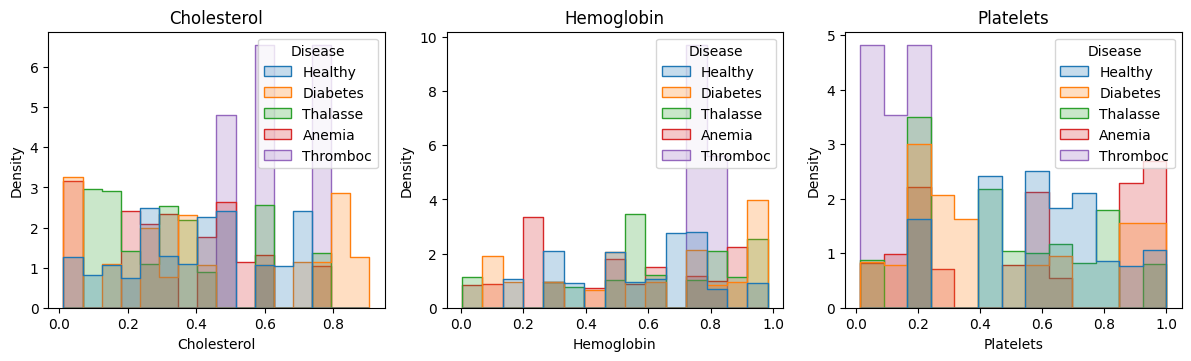

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# List of features to plot
features = [
    'Cholesterol', 'Hemoglobin', 'Platelets',

]
# Histograms
plt.figure(figsize=(16, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 4, i)
    sns.histplot(train_data, x=feature, hue='Disease', element='step', stat='density', common_norm=False)
    plt.title(feature)
plt.tight_layout()
plt.show()


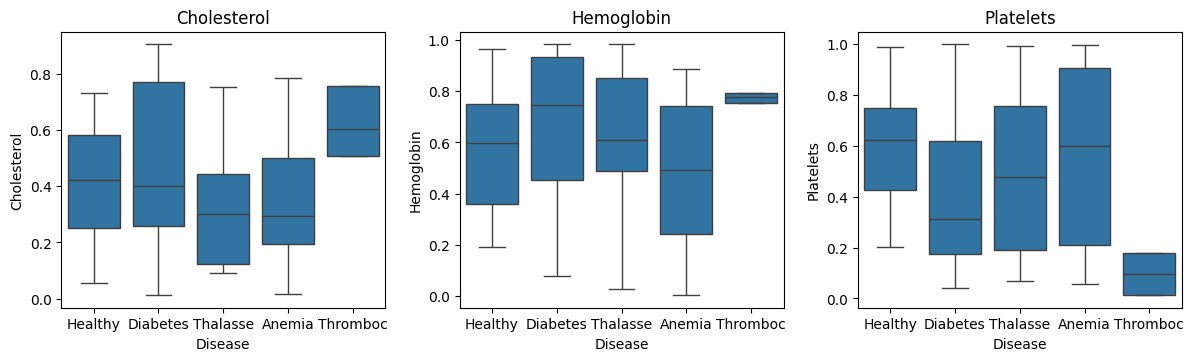

In [115]:
plt.figure(figsize=(16, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(x='Disease', y=feature, data=train_data)
    plt.title(feature)
plt.tight_layout()
plt.show()

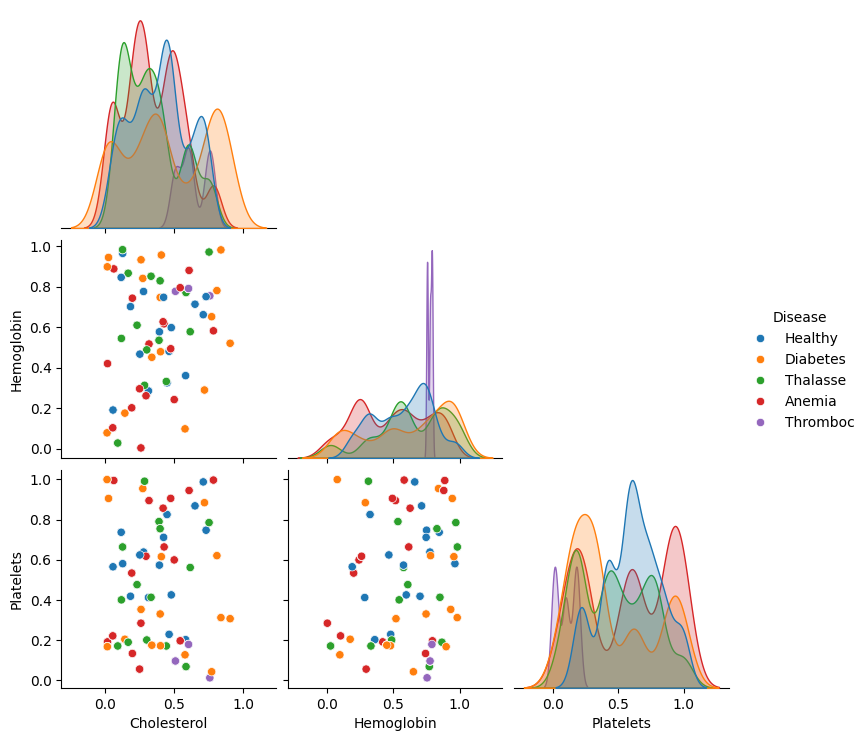

In [119]:
# Pairplot
sns.pairplot(train_data[features + ['Disease']], hue='Disease', corner=True)
plt.show()